# Non Linear Regression

### California Test Score Data Set

The California Standardized Testing and Reporting data set contains data on test performance, school characteristics, and student demographic backgrounds. 

Test scores are the average of the reading and math scores. The student–teacher ratio used here is the number of students in the district divided by the number of full-time equivalent teachers.

The demographic variables include the percentage of students who are in the public assistance program CalWorks, the percentage of students who qualify for a reduced-price lunch, and the percentage of students who has English as a second language.

The dataset is used in the reference textbook Introduction to Econometrics, 4th edition 
(Stock and Watson).

In [9]:
# Importing useful libraries and loading data set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence as soi

In [3]:
df = pd.read_excel("caschool.xlsx")
df

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,704.300049,0.198171,7290.338867,16.474134,28.716999,5.995935,700.900024,707.700012
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,706.750000,0.193609,5741.462891,17.862625,41.734108,4.726101,704.000000,709.500000
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.150000,3.563500,37.193802,45,645.000000,0.102041,4402.831543,21.885857,23.733000,24.263039,648.299988,641.700012
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.000000,11.881200,59.405899,14,672.200012,0.138614,4776.336426,20.200001,9.952000,2.970297,667.900024,676.500000


## Quadratic Regression

Let's look at the relationship between Test Scores and District Income using a scatterplot

<function matplotlib.pyplot.show(close=None, block=None)>

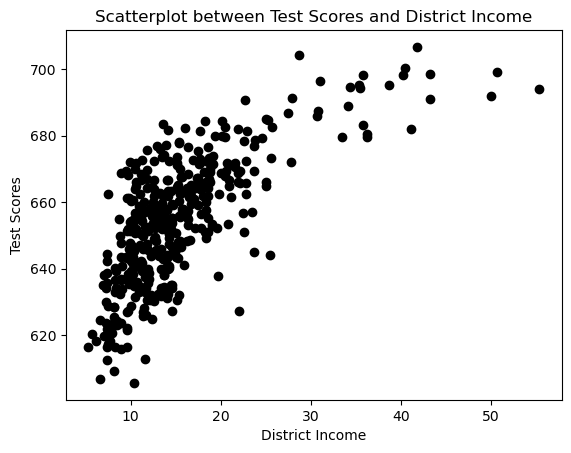

In [5]:
# Creating a scatterplot for the relationship between test scores and income

plt.scatter(df.avginc,df.testscr,color='k')                 # Scatterplot: points in black

plt.title("Scatterplot between Test Scores and District Income")           # Plot title
plt.xlabel("District Income")                                        # Plot x-axis label
plt.ylabel("Test Scores")                                                # Plot y-axis label

plt.show

Let's run a quadratic regression including district income and its squared values as additional regressors.

The regression equation is

$$ TestScore_i = \beta_0 + \beta_1 Income_i + \beta_2 Income_{i}^{2} $$

<function matplotlib.pyplot.show(close=None, block=None)>

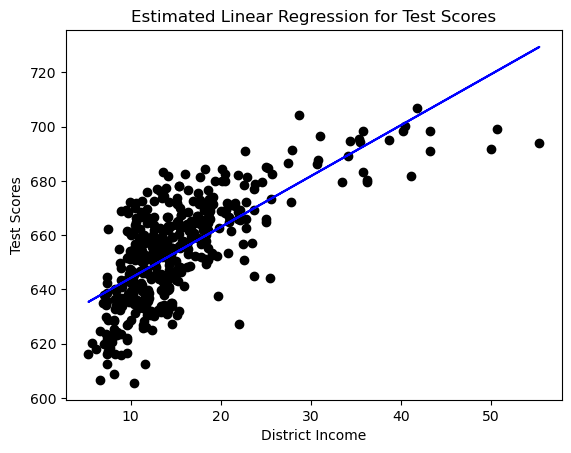

In [6]:
# Creating the estimated regression line for Test Scores

lin_mod = smf.ols('testscr ~ avginc', df).fit()
y_hat = lin_mod.params.Intercept + lin_mod.params['avginc']*df.avginc

# Creating a scatterplot with both regression lines

plt.scatter(df.avginc,df.testscr,color='k')                 # Scatterplot: points in black
plt.plot(df.avginc,y_hat,color='b')                         # Regression line in blue

plt.title("Estimated Linear Regression for Test Scores")           # Plot title
plt.xlabel("District Income")                                        # Plot x-axis label
plt.ylabel("Test Scores")                                                # Plot y-axis label

plt.show

In [7]:
# Create a new variable with the squared district income values

df['avginc_2'] = df['avginc']**2

# Fit the quadratic regression

formula = 'testscr ~ avginc + avginc_2'
model = smf.ols(formula, df).fit(cov_type = "HC0")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     431.6
Date:                Wed, 12 Mar 2025   Prob (F-statistic):          2.69e-102
Time:                        16:55:02   Log-Likelihood:                -1662.7
No. Observations:                 420   AIC:                             3331.
Df Residuals:                     417   BIC:                             3344.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    607.3017      2.891    210.039      0.0

## Ramsey's RESET Test

Ramsey's RESET test is a test of whether the functional form of the regression is appropriate.

Let's test if the specification for the linear model in income is adequate

$$ TestScore_i = \beta_0 + \beta_1 Income_i $$

In [10]:
soi.reset_ramsey(lin_mod, degree = 2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=45.67697270582521, p=4.713383388594822e-11, df_denom=417, df_num=1>

The p-value of the F-Statistic is approximately 0%. The null hypothesis of correct specification can be rejected.

It suggests we could improve our model by adding second degree transformations of our variables

## Linear-log model

In [11]:
# Create a new variable with the log district income values

df['log_avginc'] = np.log(df['avginc'])

# Fit the linear-Log regression

formula = 'testscr ~ log_avginc'
lin_log = smf.ols(formula, df).fit(cov_type = "HC0")
print(lin_log.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     682.9
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           6.18e-90
Time:                        16:56:21   Log-Likelihood:                -1659.7
No. Observations:                 420   AIC:                             3323.
Df Residuals:                     418   BIC:                             3331.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    557.8323      3.831    145.618      0.0

## Linear-log model

In [12]:
# Create a new variable with the log testscore values

df['log_testscr'] = np.log(df['testscr'])

# Fit the Log-linear regression

formula = 'log_testscr ~ avginc'
log_lin = smf.ols(formula, df).fit(cov_type = "HC0")
print(log_lin.summary())

                            OLS Regression Results                            
Dep. Variable:            log_testscr   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     265.1
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           1.63e-46
Time:                        16:56:23   Log-Likelihood:                 1034.7
No. Observations:                 420   AIC:                            -2065.
Df Residuals:                     418   BIC:                            -2057.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4394      0.003   2230.527      0.0

## Log-log regression

In [13]:
# Fit the Log-log regression

formula = 'log_testscr ~ log_avginc'
log_log = smf.ols(formula, df).fit(cov_type = "HC0")
print(log_log.summary())

                            OLS Regression Results                            
Dep. Variable:            log_testscr   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     671.0
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           6.09e-89
Time:                        16:56:24   Log-Likelihood:                 1061.2
No. Observations:                 420   AIC:                            -2118.
Df Residuals:                     418   BIC:                            -2110.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3363      0.006   1072.056      0.0